In [3]:
# E-commerce Furniture Dataset Project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:

# Load the dataset
df = pd.read_csv("ecommerce_furniture_dataset_2024.csv")  # Replace with your actual file name

# Display the first few rows
print(df.head())

# Optional: Display shape and column names
print(f"Dataset shape: {df.shape}")
print(f"Column names: {df.columns.tolist()}")


                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  
Dataset shape: (2000, 5)
Column names: ['productTitle', 'originalPrice', 'price', 'sold', 'tagText']


In [6]:
# Drop rows with missing values in key columns
df.dropna(subset=['price', 'tagText'], inplace=True)

# Drop 'originalPrice' column (assumed to have >75% nulls)
df.drop(columns=['originalPrice'], inplace=True)

# Convert 'price' to float (remove dollar signs or commas if needed)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Simplify 'tagText' categories
df['tagText'] = df['tagText'].apply(
    lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others'
)

# Encode 'tagText' using LabelEncoder
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

# Check the transformed DataFrame
print(df.head())

                                        productTitle   price  sold  tagText
0  Dresser For Bedroom With 9 Fabric Drawers Ward...   46.79   600        1
1  Outdoor Conversation Set 4 Pieces Patio Furnit...  169.72     0        1
2  Desser For Bedroom With 7 Fabric Drawers Organ...   39.46     7        1
3  Modern Accent Boucle Chair,Upholstered Tufted ...  111.99     0        1
4  Small Unit Simple Computer Desk Household Wood...   21.37     1        1


<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
C:\Users\91935\AppData\Local\Temp\ipykernel_10776\4236328511.py:8: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


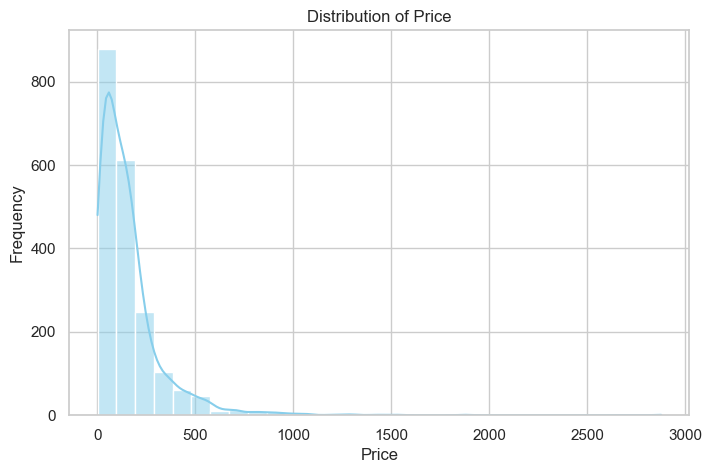

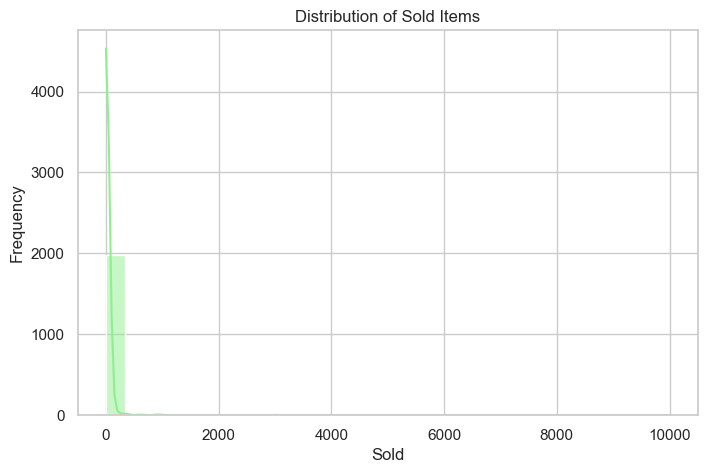

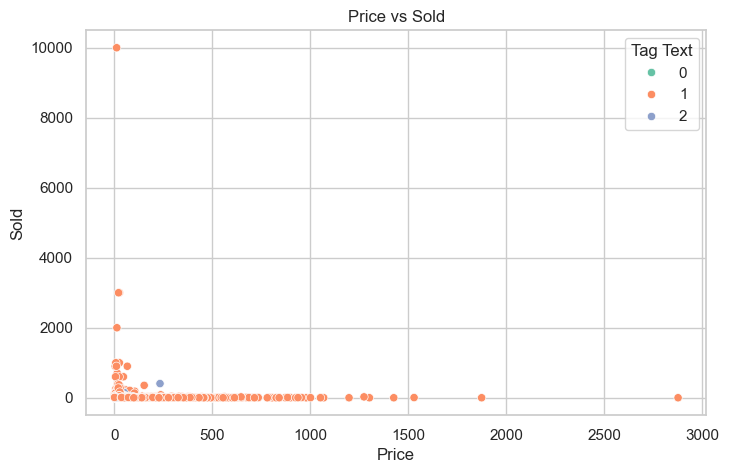

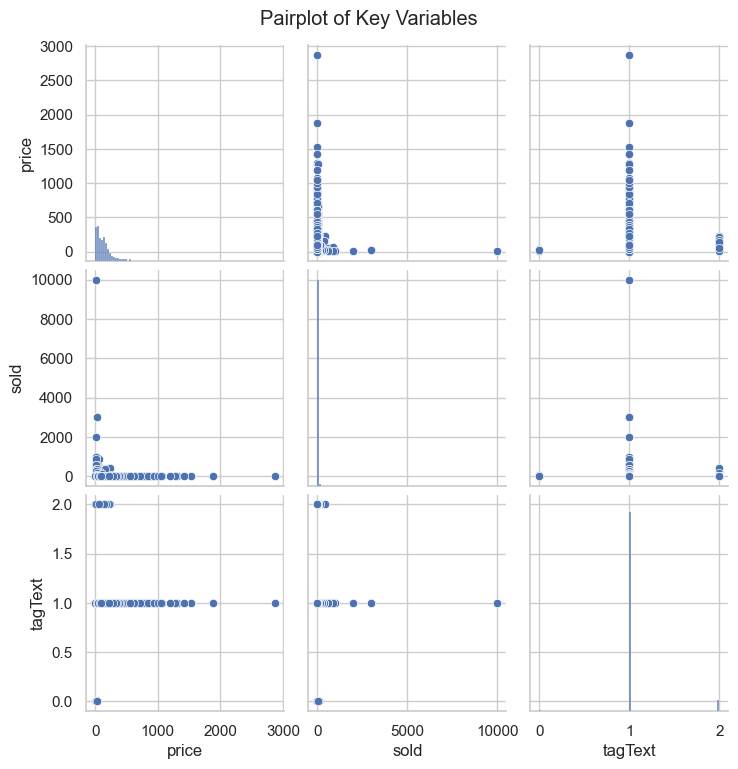

In [7]:
# Set a visual theme
sns.set(style="whitegrid")

# 1. Distribution of 'price'
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of 'sold'
plt.figure(figsize=(8, 5))
sns.histplot(df['sold'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Sold Items')
plt.xlabel('Sold')
plt.ylabel('Frequency')
plt.show()

# 3. Scatterplot: Price vs Sold
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price', y='sold', data=df, hue='tagText', palette='Set2')
plt.title('Price vs Sold')
plt.xlabel('Price')
plt.ylabel('Sold')
plt.legend(title='Tag Text')
plt.show()

# 4. Pairplot to observe correlations
sns.pairplot(df[['price', 'sold', 'tagText']])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

In [8]:

# 1. Initialize the vectorizer
tfidf = TfidfVectorizer(max_features=100)  # You can adjust number of features

# 2. Fit and transform the 'productTitle' column
tfidf_matrix = tfidf.fit_transform(df['productTitle'].fillna(""))

# 3. Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# 4. Merge TF-IDF features with the original dataset
df = pd.concat([df.reset_index(drop=True), tfidf_df], axis=1)

# 5. Drop the original 'productTitle' column
df.drop(columns=['productTitle'], inplace=True)

# Preview the updated DataFrame
print(df.head())

    price  sold  tagText  adjustable  and  bed   bedroom  bedside  bench  \
0   46.79   600        1         0.0  0.0  0.0  0.189728      0.0    0.0   
1  169.72     0        1         0.0  0.0  0.0  0.000000      0.0    0.0   
2   39.46     7        1         0.0  0.0  0.0  0.200320      0.0    0.0   
3  111.99     0        1         0.0  0.0  0.0  0.000000      0.0    0.0   
4   21.37     1        1         0.0  0.0  0.0  0.000000      0.0    0.0   

   black  ...   up  upholstered  vanity  velvet  wardrobe  white   wicker  \
0    0.0  ...  0.0     0.000000     0.0     0.0  0.299913    0.0  0.00000   
1    0.0  ...  0.0     0.000000     0.0     0.0  0.000000    0.0  0.30009   
2    0.0  ...  0.0     0.000000     0.0     0.0  0.000000    0.0  0.00000   
3    0.0  ...  0.0     0.339159     0.0     0.0  0.000000    0.0  0.00000   
4    0.0  ...  0.0     0.000000     0.0     0.0  0.000000    0.0  0.00000   

       with  wood    wooden  
0  0.119967   0.0  0.000000  
1  0.000000   0.0  0

In [9]:
# 1. Define features (X) and target (y)
X = df.drop(columns=['sold'])  # Assuming 'sold' is the target variable
y = df['sold']

# 2. Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 4. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 5. Evaluate models
print("Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}\n")

print("Random Forest Regressor:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")

Linear Regression:
R² Score: 0.0243
MSE: 25923.9632

Random Forest Regressor:
R² Score: 0.7178
MSE: 7498.3520


In [10]:
# Linear Regression Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation results
print("Model Evaluation Results:")
print("Linear Regression:")
print(f"  - Mean Squared Error: {mse_lr:.2f}")
print(f"  - R-squared Score: {r2_lr:.4f}\n")

print("Random Forest Regressor:")
print(f"  - Mean Squared Error: {mse_rf:.2f}")
print(f"  - R-squared Score: {r2_rf:.4f}")

Model Evaluation Results:
Linear Regression:
  - Mean Squared Error: 25923.96
  - R-squared Score: 0.0243

Random Forest Regressor:
  - Mean Squared Error: 7498.35
  - R-squared Score: 0.7178


C:\Users\91935\AppData\Local\Temp\ipykernel_10776\3117613481.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


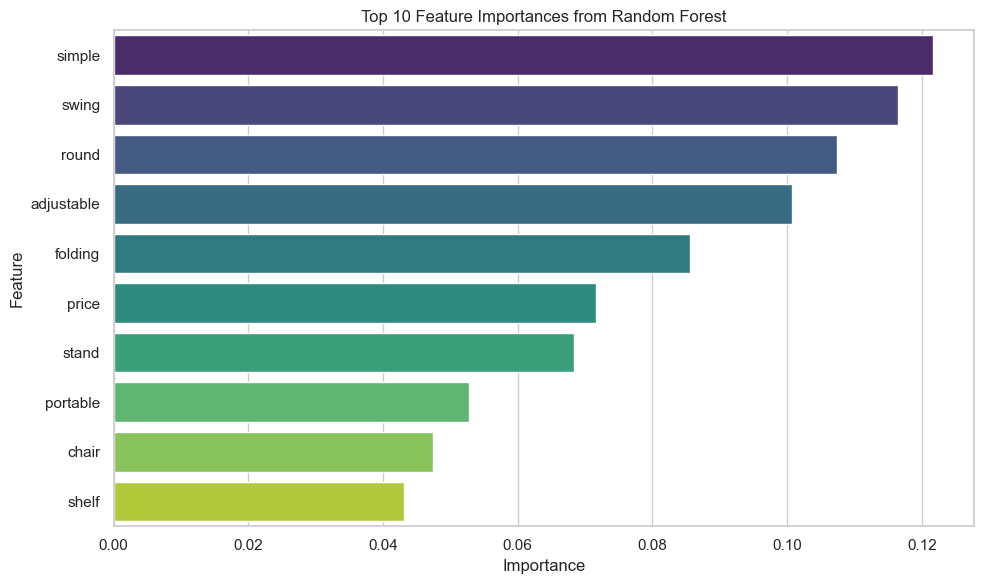

In [11]:
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Plot top 10 features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
